# K-means # 

**Import the usuals**

In [0]:
#import the usuals
#import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import datasets
from sklearn.cluster import KMeans

We will be working with the dataset iris, which is about flowers. We will try to classify flowers based on the sepal length and width. **First select the data inside the dictionary we call iris_df**

In [0]:
iris_df = datasets.load_iris()
#print(iris_df.DESCR)
#access the data 
x = iris_df.data


**Now split the data into training and test set**

In [0]:
#split data
sepal_data=x[:,[0,2]]
sepal_data_train, sepal_data_test = train_test_split(sepal_data, random_state=10, test_size = 0.7)

 **From the dataset we just loaded, select the first column - which is the sepal length, and the 2nd column, which is the sepal width. Make it so these two are one data frame **

In [0]:
# sepal_length_train = etc 
sepal_data_train

array([[5.6, 4.2],
       [5.1, 1.7],
       [4.6, 1. ],
       [6.1, 4.9],
       [5. , 3.3],
       [5.7, 1.7],
       [5.2, 1.5],
       [5.5, 1.3],
       [4.9, 3.3],
       [5.4, 1.5],
       [6.7, 4.4],
       [4.8, 1.4],
       [5.5, 4. ],
       [6. , 5. ],
       [4.8, 1.6],
       [6.7, 4.7],
       [5.8, 4. ],
       [6.2, 5.4],
       [5. , 1.6],
       [6. , 4.8],
       [4.3, 1.1],
       [5.6, 3.9],
       [6.7, 5. ],
       [7.7, 6.1],
       [6.3, 5.6],
       [5.5, 1.4],
       [6. , 4. ],
       [7.7, 6.7],
       [7.3, 6.3],
       [5.6, 4.1],
       [6.5, 4.6],
       [6.3, 6. ],
       [5.4, 1.3],
       [6.4, 5.3],
       [5. , 1.3],
       [5.1, 1.4],
       [6.1, 4.7],
       [4.4, 1.4],
       [6.7, 5.2],
       [6.3, 4.9],
       [5.7, 5. ],
       [5.6, 3.6],
       [5.7, 1.5],
       [7.2, 6. ],
       [4.9, 1.5]])

**Plot the sepal length against sepal width. Plot both the training and test set, and see if you can give them different colours**

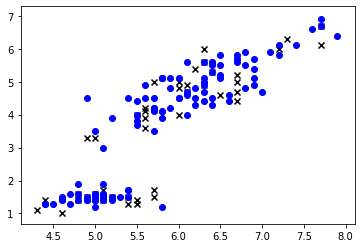

In [0]:
# plt.plot()... 
plt.scatter(sepal_data_train[:,0], sepal_data_train[:,1], color='black', marker="x")
plt.scatter(sepal_data_test[:,0], sepal_data_test[:,1], color='blue')

A kmeans is created the following way, where the n_cluster is the number of clusters you want, max_iter is the maximum number of iterations, n_init is number of times the algorithm will run with different cluster seeds. 

In [0]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(sepal_data_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

To find the optimum cluster number, **put the lines above in a for loop, where the loop variable is the number inside n_clusters. Append kmeans.inertia_ to an array for each of the iterations. This inertia is a measure of the error **

In [0]:
iteration_count = []
iteration_results = []
#print(range(10))
for i in np.arange(1,10,1):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(sepal_data_train)
    iteration_results.append(kmeans.inertia_)
    iteration_count.append(i)
    if kmeans.inertia_ == 0:
        break

**Now plot the kmeans inertia against the number of clusters** 

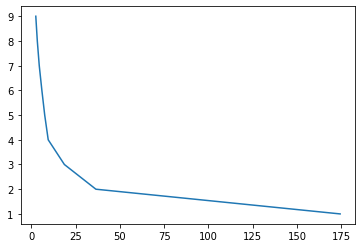

In [0]:
plt.plot(iteration_results,iteration_count)
plt.xlabel = "Inertia"
plt.ylabel = "N Clusters"

**Choose the best number of clusters and fit the model to the test data using: 
kmeans.fit_predict(iris_test) **

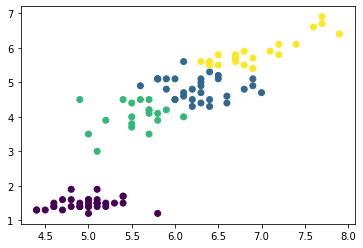

In [0]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(sepal_data_train)
#len(kmeans.fit_predict(sepal_data_test))
#len(kmeans.fit_predict(sepal_data_test))
plt.scatter(sepal_data_test[:,0], sepal_data_test[:,1],c=kmeans.fit_predict(sepal_data_test))


**Now make a scatter plot of the fit, where you can use the category as colour by doing something like
plt.scatter(Sepal_len, Sepal_Wid, c=kmeans.fit_predict(Sepal_data))**